In [1]:
from map_tool_box.modules import Data_Structure
from map_tool_box.modules import Data_Map
from map_tool_box.modules import Action
from map_tool_box.modules import Astar
from map_tool_box.modules import Utils

In [2]:
data_map = Data_Map.DataMapRoof('AirSimNH', memory_saver=True)

# make astar object that considers d-pad motions with no rotations

In [3]:
data_map = Data_Map.DataMapRoof('AirSimNH', memory_saver=True)

# astar can make d-pad actions, no rotations
actions = []
magnitudes = [2, 4, 8, 16, 32]
for magnitude in magnitudes:
    actions.append(Action.Move(Action.step_forward, magnitude))
    actions.append(Action.Move(Action.step_backward, magnitude))
    actions.append(Action.Move(Action.step_left, magnitude))
    actions.append(Action.Move(Action.step_right, magnitude))
    
costs = [1]*len(actions)
heuristic = Astar.dpad_heursitic
heuristic_kwargs = {
    'max_x':max(magnitudes),
    'max_y':max(magnitudes), 
    'max_z':1,
}
goal_tolerance = 0
pather = Astar.Astar(data_map, actions, costs, heuristic, heuristic_kwargs, goal_tolerance=goal_tolerance)

# find path

In [5]:
start_point = Data_Structure.Point(0,0,4,0)
target_point = Data_Structure.Point(120,180,4)
path, iterations, result = pather.search(start_point, target_point)
print('astar search result =', result, 'in', iterations, 'iterations')

astar search result = goal in 1351 iterations


# visualize path

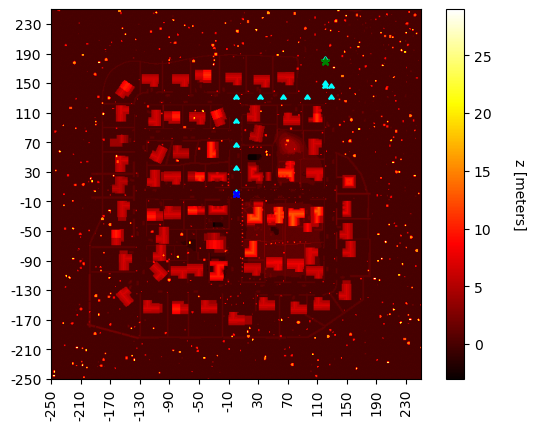

In [6]:
data_map.view_path(path)

# Astar version with rotations that can only move forward

astar search result = goal in 726 iterations


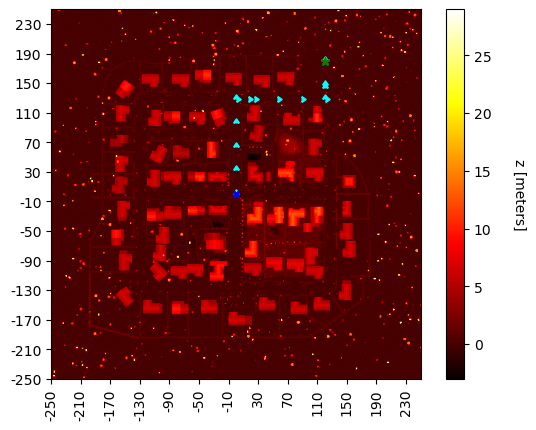

In [7]:
data_map = Data_Map.DataMapRoof('AirSimNH', memory_saver=True)

# astar can only move facing the current direction, but can rotate direction
actions = []
magnitudes = [2, 4, 8, 16, 32]
for magnitude in magnitudes:
    actions.append(Action.Forward(magnitude))
actions.append(Action.RotateLeft())
actions.append(Action.RotateRight())
    
costs = [1]*len(actions)
heuristic = Astar.forward_heursitic
heuristic_kwargs = {
    'max_xy':max(magnitudes),
    'max_z':1,
}
goal_tolerance = 0
pather = Astar.Astar(data_map, actions, costs, heuristic, heuristic_kwargs, goal_tolerance=goal_tolerance)

# find path
start_point = Data_Structure.Point(0,0,4,0)
target_point = Data_Structure.Point(120,180,4)
path, iterations, result = pather.search(start_point, target_point)
print('astar search result =', result, 'in', iterations, 'iterations')

# visualize path
data_map.view_path(path)